# Part B

## Question 2

### a - Load dataset and retain the last 10 years of GDP data

In [171]:
# load necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.frequencies import to_offset

In [113]:
# load world bank dataset
world_bank = pd.read_table('./Data/PartB_Q2/World_Bank.txt', skiprows=3)

# look at the first 5 rows of the data 
world_bank.head(5)

,Country,Country Code,Indicator Name,Indicator Code,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008860e+11,1.039110e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [114]:
# look at all column names in the world bank dataset
world_bank.columns

Index(['Country', 'Country Code', 'Indicator Name', 'Indicator Code', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [115]:
# retain data for the last 10 years (2014 - 2023)
world_bank_10 = world_bank.iloc[:, [0,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]]

# check column
world_bank_10.columns

Index(['Country', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')

### b - merge world bank and energy on country

In [116]:
# load energy dataset
energy = pd.read_csv('./Data/PartB_Q2/Energy.csv')

# look at the head of the energy data
energy.head()

,Country,Total Energy Supply,Energy Supply per Capita,%Renewable
0,Afghanistan,3.210000e+08,10.0,78.67
1,Albania,1.020000e+08,35.0,100.00
2,Algeria,1.959000e+09,51.0,0.55
3,American Samoa,NaN,NaN,0.64
4,Andorra,9.000000e+06,121.0,88.70


In [117]:
# merge energy with world bank data for the last 10 years. Then, set country as index
merged_data = pd.merge(world_bank_10, energy, on = 'Country').set_index('Country')

# make sure data has only 185 rows and 13 columns
merged_data.shape

(185, 13)

In [118]:
# look at the first 5 rows of the new data
merged_data.head(5)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Energy Supply,Energy Supply per Capita,%Renewable
Country,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN,12000000.0,120.0,14.87
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN,9000000.0,121.0,88.70
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10,321000000.0,10.0,78.67
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008860e+11,1.039110e+11,642000000.0,27.0,70.91
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10,102000000.0,35.0,100.00


### c - calculate population

In [119]:
# calculate the population
merged_data['Population'] = merged_data['Total Energy Supply'] / merged_data['Energy Supply per Capita']

# look at the head of the population column
merged_data.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Energy Supply,Energy Supply per Capita,%Renewable,Population
Country,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN,12000000.0,120.0,14.87,1.000000e+05
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN,9000000.0,121.0,88.70,7.438017e+04
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10,321000000.0,10.0,78.67,3.210000e+07
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008860e+11,1.039110e+11,642000000.0,27.0,70.91,2.377778e+07
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10,102000000.0,35.0,100.00,2.914286e+06


In [ ]:
# fift most populous country
merged_data.sort_values(by = 'Population', ascending = False).iloc[4,0]

'Brazil'

### d - calculate average gdp

In [126]:
# calculate average gdp for 10 years for each country
merged_data['avg_gdp'] = merged_data.iloc[:,:10].mean(axis=1)
merged_data['avg_gdp']

Country
Aruba           2.467704e+09
Andorra         3.504957e+09
Afghanistan     1.610842e+10
Angola          8.412118e+10
Albania         1.177673e+10
                    ...     
Vanuatu         6.890296e+08
Samoa           6.788420e+08
South Africa    3.823934e+11
Zambia          2.057734e+10
Zimbabwe        1.054389e+10
Name: avg_gdp, Length: 185, dtype: float64

### e - create column renewable indicator

In [129]:
merged_data['Renewable_Indicator'] = merged_data['%Renewable'] > merged_data['%Renewable'].median()
merged_data['Renewable_Indicator']

Country
Aruba           False
Andorra          True
Afghanistan      True
Angola           True
Albania          True
                ...  
Vanuatu         False
Samoa            True
South Africa    False
Zambia           True
Zimbabwe         True
Name: Renewable_Indicator, Length: 185, dtype: bool

### f - continent

In [130]:
# continent dictionary
continent_dict={'China':'Asia',
               'United States': 'North America',
               'Japan':'Asia',
               'United Kingdom':'Europe',
               'Argentina':'South America',
               'Colombia':'South America',
               'Canada': 'North America',
               'Germany':'Europe',
               'India':'Asia',
               'South Korea':'Asia',
               'Italy':'Europe',
               'Algeria': 'Africa',
               'Indonesia':'Asia',
               'Morocco':'Africa',
               'Sudan':'Africa',
               'New Zealand':'Australia',
               'Australia':'Australia',
               'South Africa':'Africa'
               }

In [140]:
merged_data.groupby(continent_dict)['Population'].mean()

Country
Africa           4.107654e+07
Asia             6.143410e+08
Australia        1.389270e+07
Europe           6.804964e+07
North America    1.764276e+08
South America    4.502037e+07
Name: Population, dtype: float64

## Question 3

In [ ]:
# read all 3 txt files given
text1 = pd.read_table('./Data/PartB_Q3a/text1.txt')
text2 = pd.read_table('./Data/PartB_Q3a/text2.txt')
text3 = pd.read_table('./Data/PartB_Q3a/text3.txt')

letters = {}
for letter in text1:
    letter = letter.strip()
    if letter in letters:
        letters[letter] += 1
    else:
        letters[letter] = 1
    
for let, count in letters.items():
    print(f"{let} : {count}")

People buy Teslas because of their strong brand image, advanced technology, and extensive Supercharger network. Tesla cars are known for their impressive performance, constant software updates that keep the vehicles current. : 1


In [111]:
text1.lower()

AttributeError: 'DataFrame' object has no attribute 'lower'

In [ ]:
common_word = ['a', 'the', 'and', 'from', 'where', 'what', 'was', 'when', 'I', 'you', 'we', 'us', 'me', 'for']

## Question 4

### a i - calculate total sales for each product

In [30]:
# load sales and product dataset
sales = pd.read_csv('./Data/PartB_Q4/sales_data.csv')
product = pd.read_csv('./Data/PartB_Q4/products.csv')

# look at the first 5 rows of sales dataset
sales.head(5)

,Transaction_ID,Product_ID,Date,Quantity,Price,Customer_ID
0,1,4,2023-02-04,7,63.180365,10
1,2,5,2023-05-03,9,70.980793,3
2,3,3,2022-12-18,8,11.492905,18
3,4,5,2023-01-20,2,56.088375,13
4,5,5,2023-05-10,1,30.384620,7


In [31]:
# look at the first 5 rows of product dataset
product.head(5)

,Product_ID,Product_Name
0,1,Milk
1,2,Biscuits
2,3,Coffee
3,4,Meat
4,5,Noodles


In [141]:
# to display the product name, we need to merge the two files first
product_sales = pd.merge(sales, product, on = 'Product_ID')

# look at the first 5 rows of the merged data
product_sales.head(5)

,Transaction_ID,Product_ID,Date,Quantity,Price,Customer_ID,Product_Name
0,1,4,2023-02-04,7,63.180365,10,Meat
1,2,5,2023-05-03,9,70.980793,3,Noodles
2,3,3,2022-12-18,8,11.492905,18,Coffee
3,4,5,2023-01-20,2,56.088375,13,Noodles
4,5,5,2023-05-10,1,30.384620,7,Noodles


In [ ]:
# calculate sales generated by each transaction 
product_sales['Sales'] = product_sales['Price'] * product_sales['Quantity']

# group by product to find sales generated by each product
total_sales = product_sales.groupby('Product_Name').sum('Sales').sort_values(by = 'Sales')

# look at the sales generate by each product in a data frame
total_sales['Sales'].to_frame()

,Sales
Product_Name,
Coffee,3738.186287
Noodles,3927.886522
Milk,5888.964655
Biscuits,6005.730580
Meat,7351.175050


### a ii -

In [152]:
# calculate the average quantity per transaction
qty = product_sales.groupby('Product_Name')['Quantity'].mean().sort_values(ascending=False).head(3)

# look at the data in data frame
qty.to_frame()

,Quantity
Product_Name,
Milk,5.500000
Biscuits,5.047619
Coffee,5.000000


### a iii - visualize sales and interpolate data

C:\Users\hazim\AppData\Local\Temp\ipykernel_19428\555334764.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sale_data = product_sales.sort_values(by = 'Date').set_index('Date').interpolate()['Sales']


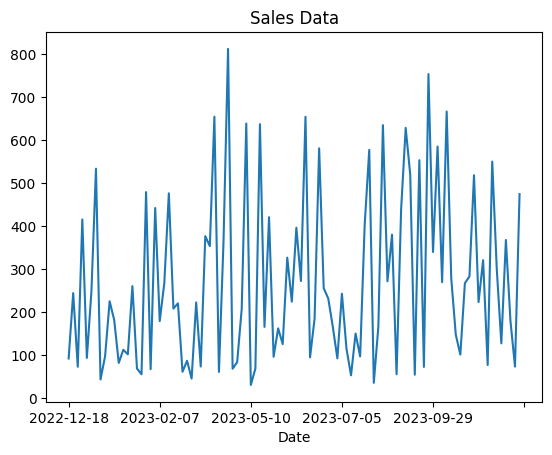

In [ ]:
# sort data according to date and interpolate any missing value
sale_data = product_sales.sort_values(by = 'Date').set_index('Date').interpolate()['Sales']

# plot the sales data using line plot
sale_data.plot(kind='line')
plt.title('Sales Data')
plt.show();

### a iv - interpretation

we can see that the sales data is roughly stationary with little to no trend.

### b i - merge customers

In [ ]:
# load customer dataset
customer = pd.read_csv('./Data/PartB_Q4/customers.csv')

# look at the first 5 rows of the customers dataset
customer.head()

,Customer_ID,Name,Email,Country
0,1,Justin Mason,johnsonamanda@example.org,Serbia
1,2,Michael Turner,hwilliams@example.com,Mexico
2,3,John Holland,kinglindsay@example.com,China
3,4,Belinda Jones,fordgary@example.org,Marshall Islands
4,5,Mary Vargas,vcarter@example.net,Montenegro


In [ ]:
# merge customer data to the previously merged sales and product data
merged_data_all = pd.merge(product_sales, customer, on = 'Customer_ID')

# look at the first 5 rows of the final merged data
merged_data_all.head(5)

,Transaction_ID,Product_ID,Date,Quantity,Price,Customer_ID,Product_Name,Sales,Name,Email,Country
0,1,4,2023-02-04,7,63.180365,10,Meat,442.262554,Samantha Crawford,levi08@example.com,Australia
1,2,5,2023-05-03,9,70.980793,3,Noodles,638.827133,John Holland,kinglindsay@example.com,China
2,3,3,2022-12-18,8,11.492905,18,Coffee,91.943237,Scott Singh,uclayton@example.org,Kiribati
3,4,5,2023-01-20,2,56.088375,13,Noodles,112.176750,Kim Williams,browningsharon@example.net,Poland
4,5,5,2023-05-10,1,30.384620,7,Noodles,30.384620,Victor Ryan,martinezchristina@example.com,Montenegro


### b ii - 

In [154]:
# calculate total number of transactions by each country
merged_data_all.groupby('Country')['Transaction_ID'].count().to_frame()

,Transaction_ID
Country,
Australia,5
Botswana,1
China,4
Estonia,7
Falkland Islands (Malvinas),9
Grenada,2
Hong Kong,7
Kiribati,3
Macao,4


In [155]:
# calculate the sales generate by each country
merged_data_all.groupby('Country')['Sales'].sum().to_frame()

,Sales
Country,
Australia,1037.682251
Botswana,66.979131
China,1274.496189
Estonia,2352.322046
Falkland Islands (Malvinas),1996.388311
Grenada,419.527760
Hong Kong,2153.117167
Kiribati,818.796555
Macao,1040.062429


### b iii - top 3 products with highest sales

In [ ]:
# calculate the top three products with highest sales revenue
merged_data_all.groupby('Product_Name')['Sales'].sum().to_frame().sort_values(by = 'Sales', ascending=False).head(3)

,Sales
Product_Name,
Meat,7351.175050
Biscuits,6005.730580
Milk,5888.964655


### b iv - create column customer tenure

In [193]:
# convert Date column from string to time format
i = 1
while i <= 100:
    datetime.strptime(merged_data_all['Date'][i], '%Y-%m-%d')
    i += 1

# calculate the date from the first transaction until today
merged_data_all['Customer_Tenure'] = datetime.now() - merged_data_all['Date']

merged_data_all

KeyError: 100

## Question 5

### a - visulasize clinical study data

In [68]:
# load clinical study dataset
clinical = pd.read_csv('./Data/PartB_Q5/clinical_study_data.csv')

# look at the first 5 rows of the clinical study dataset
clinical.head(5)

,age,glucose_level,HbA1c,diabetes_duration,treatment_type,complications
0,63,133.8,6.0,3,medication,yes
1,76,122.6,7.6,8,lifestyle,no
2,53,74.7,6.9,16,lifestyle,yes
3,39,141.6,4.0,13,insulin,yes
4,67,94.7,7.0,18,medication,yes


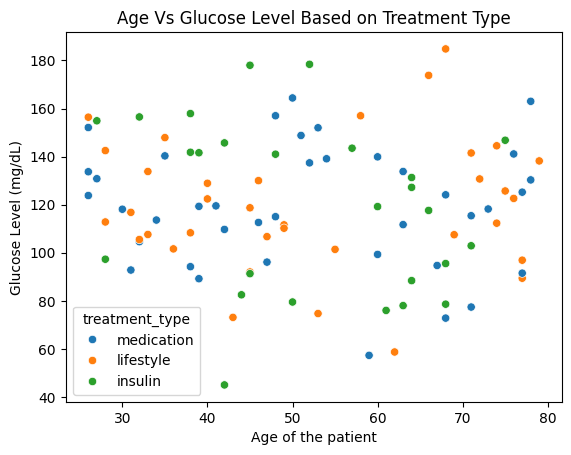

In [80]:
# plot scatter plot of age vs y using clinical data and color based on the treatment type
sns.scatterplot(x = 'age', y = 'glucose_level', data = clinical, hue = 'treatment_type')

# put in appropritate title for the plot
plt.title('Age Vs Glucose Level Based on Treatment Type')

# put in appropriate x label for the plot
plt.xlabel('Age of the patient')

# put in appropirate y label for the plot
plt.ylabel('Glucose Level (mg/dL)')

# show the plot
plt.show;

We can see that all treatment type does not have a strong relationship for age and glucose level relationship.

### b - visualize

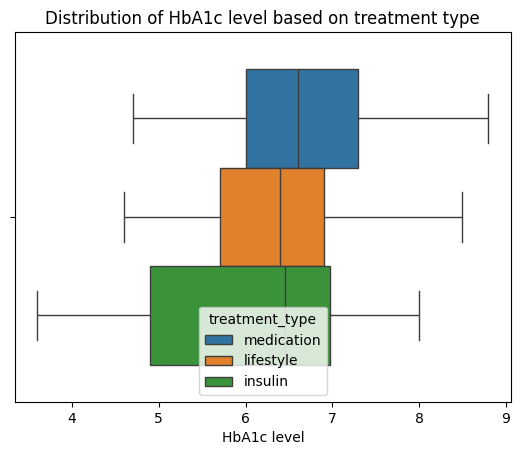

In [89]:
sns.boxplot(x = 'HbA1c', data = clinical, hue = 'treatment_type')
plt.title('Distribution of HbA1c level based on treatment type')
plt.xlabel('HbA1c level')
plt.show();

we can see that the patient with insulin treatment has the lowest  HaA1c level compared to patien with lifestyle or medication. 

### c - 

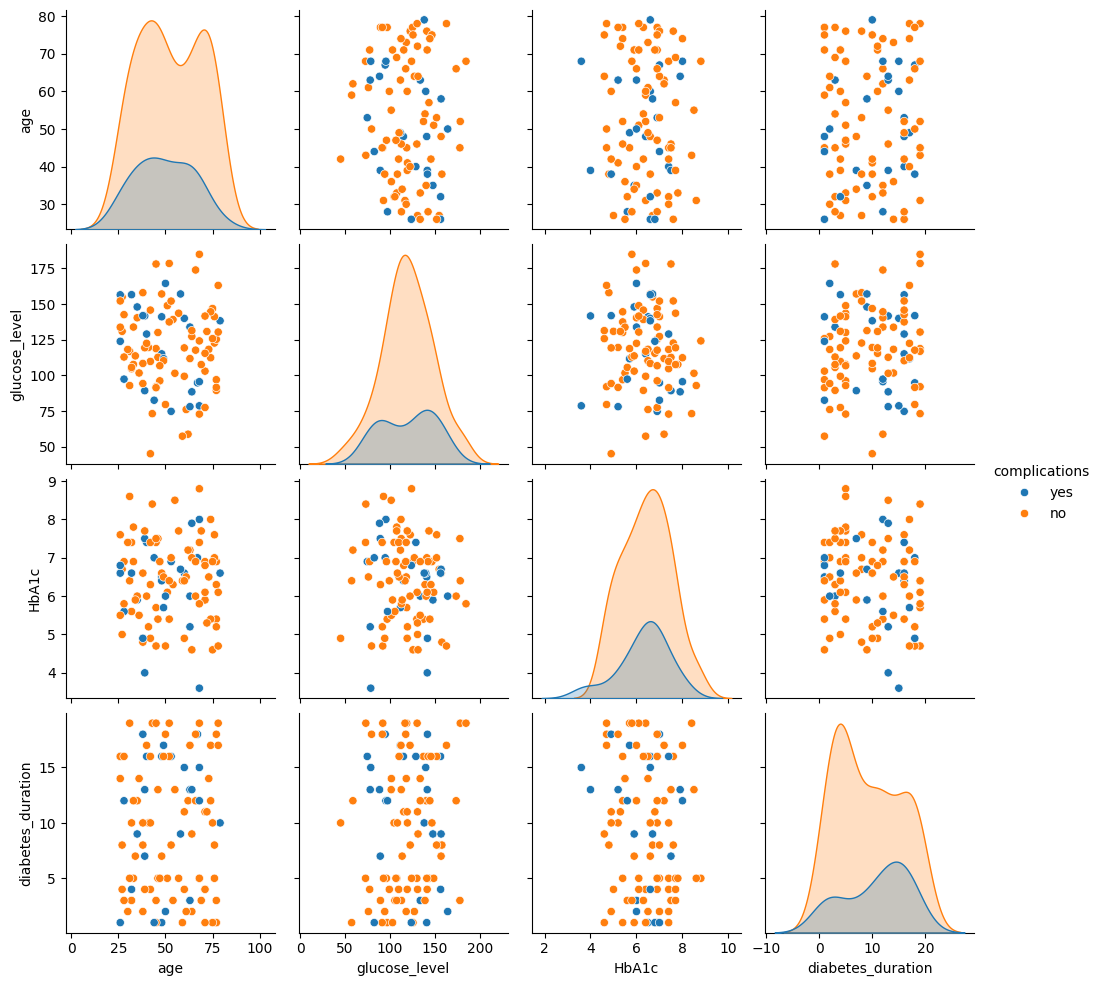

In [96]:
sns.pairplot(data = clinical, hue = 'complications')
plt.show();

We can see that all the variables have roughly the same relationship between each other.

### d - Heatmap

<Axes: >

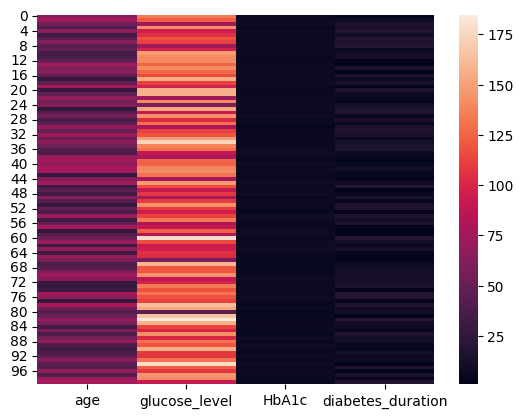

In [105]:
# visualize the potential correlation among age, glucose_level, HbA1c, diabetes_duration using heatmap
sns.heatmap(data = clinical[['age', 'glucose_level', 'HbA1c', 'diabetes_duration']])